# __Employee Performance Analysis__
## __INX Future Inc.__
### __Exploratory Data Analysis (EDA)__

#### Task Brief

- The data provided here is an Employee performance rating data gather by INC Future Inc.
- Exploratory Data Analysis as the name  suggests represents exploration of data and gathering insights from data using various statistical analysis and visualization methods

##### __Table Of Contents:__

1. [__Load important libraries and Data__]()
2. [__Data Exploration__]()
3. [__Univariate Analysis__]()
4. [__Bivariate Analysis__]()
5. [__Inferences__]()

### __Part 1. Load Important Libraries and Data__

In [2]:
# general purpose libraries
import os
from dotenv import load_dotenv

# data loading and wrangling libraries for EDA
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

# warnings
import warnings
warnings.filterwarnings('ignore')

# load the dot env file that contains the path to data file for data privacy
dotenv_path = os.getcwd()+'\\local.env'
load_dotenv(dotenv_path=dotenv_path)

# loading bokeh
from bokeh.plotting import output_notebook, show, output_file, save
output_notebook()

Loading BokehJS ...

In [3]:
main_df = pd.read_excel(os.getenv('data'))
main_df.head(3)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4


### __Part 2. Data Exploration__

In [4]:
# getting names for features of all data type
print("Numerical Features: ", list(main_df.select_dtypes(['int64', 'float64']).columns), end="\n\n")
print("Categorical Features: ", list(main_df.select_dtypes(['object','bool']).columns), end="\n\n")
print("Target Label: ", "PerformanceRating")

Numerical Features:  ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']

Categorical Features:  ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

Target Label:  PerformanceRating


In [5]:
main_df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


### __Part 3: Univariate Analysis__

We now set foot into the domain of data distribution where we try to figure out the distribution of data in each of the numerical columns using distribution plots which shall provide us with the information on which kind of distribution each feature follows namely Gaussian Distribution, Skewed normal distribution etc

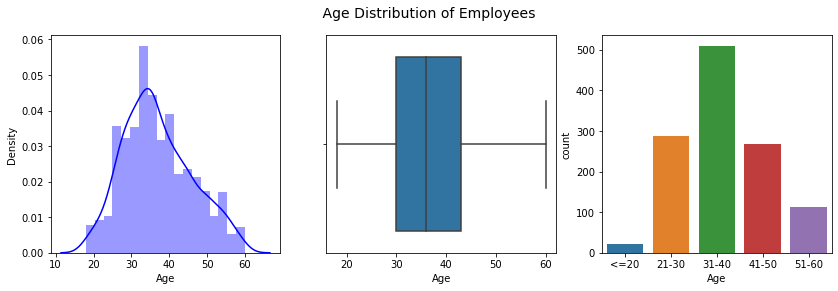

In [6]:
# bin the ages for proper count
binned_age = pd.cut(main_df.Age, bins=[0, 20,30, 40, 50, 60], labels=[ "<=20", "21-30", "31-40", "41-50", "51-60"])

# plot three figures to completely describe the distribution of Age
fig, axes = plt.subplots(1,3, figsize=(14,4), 
                       sharex=False, sharey=False, squeeze=False)

fig.suptitle(' Age Distribution of Employees ', fontsize=14)
sns.distplot(main_df.Age, ax=axes[0,0], color="blue")
sns.countplot(binned_age)
sns.boxplot(main_df.Age, ax=axes[0,1])
plt.show()

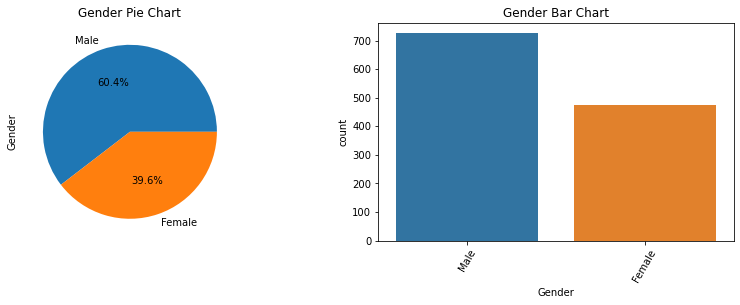

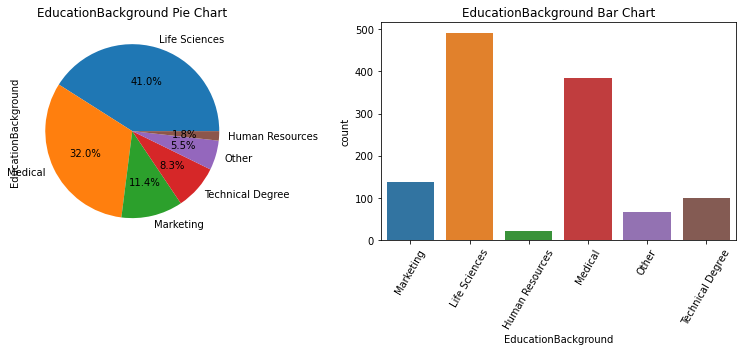

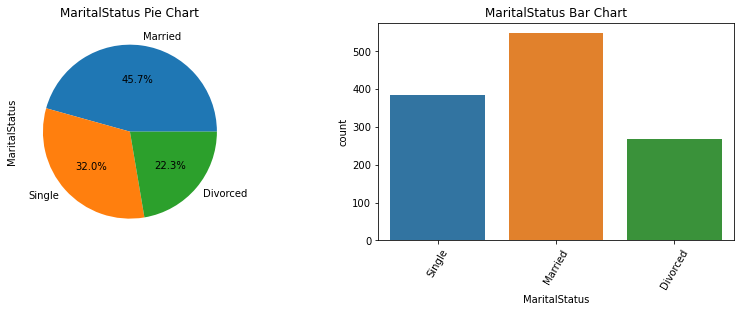

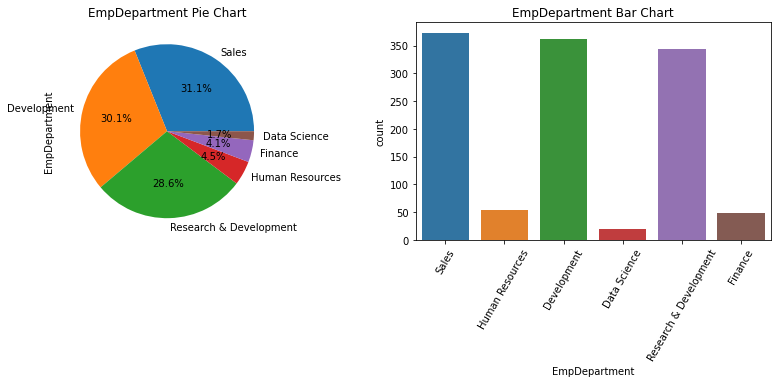

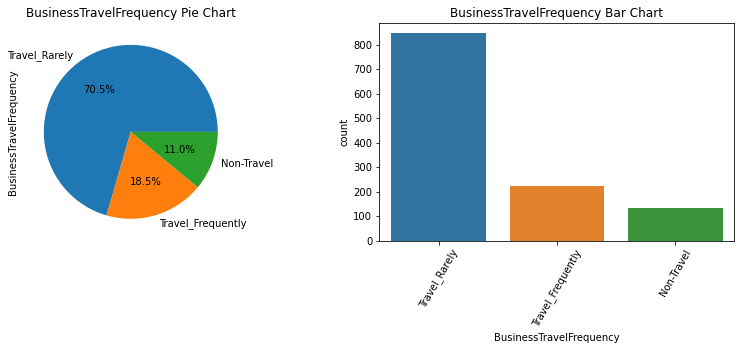

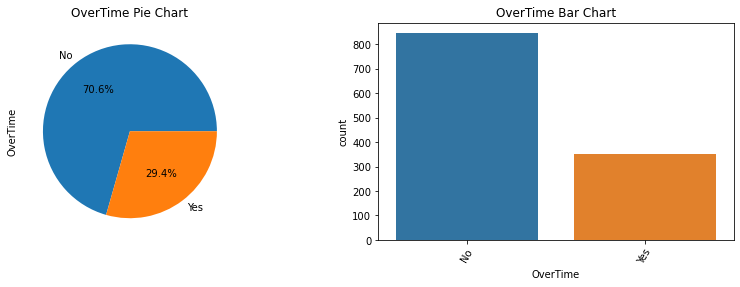

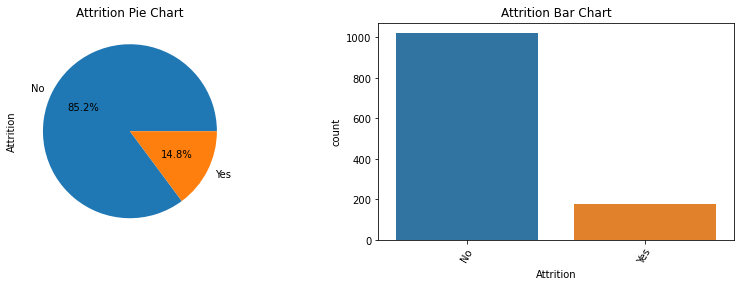

In [7]:
def plot_pie_bar_counts(i, data=main_df):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    data[i].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"{i} Pie Chart")
    plt.subplot(1,2,2)
    sns.countplot(x=i, data=data)
    plt.xticks(rotation=60)
    data[i].value_counts()
    plt.title(f"{i} Bar Chart")
    plt.show()
    
for i in main_df:
    if main_df[i].dtype in ['object','bool']:
        if i not in ["EmpJobRole", "EmpNumber"]:
            plot_pie_bar_counts(i, data=main_df)

In [8]:
# For our futher univariate analysis of numerical features we shall conveniantly use pandas profiling
from pandas_profiling import ProfileReport
EDA_report = ProfileReport(main_df)
EDA_report.to_file(output_file='INX_Future_inc_EDA_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data distribution of Variables as seen in above plots and pandas profiling generated file

### __Categorical features__
1. Gender distribution: __60.4%__ male and __39.6%__ female
2. Education Background:
    - Life sciences: __41%__
    - Medical: __32%__
    - Marketing: __11.4%__
    - Technical Degree: __8.3%__
    - Human Resources: __1.8%__
    - Others: __5.5%__
3. Employee Department:
    - __31.1%__ of the people work in sales
    - __30.1%__ of the people work in Development
    - __28.6%__ of people work in Research and development
    - __4.5%__ in HR
    - __4.1%__ in Finance
    - __1.7%__ in Data Science
4. 19 Unique Employee Job Roles are there in the organization with 22.5% Employees working as Sales executive counting as the highest number of employees in any role followed by Developers which are at 19.7% followed by the rest with each role not exceeding 8% of the total employees
5. Out the given population only __18.5%__ of the employee's travel frequently, __70.5%__ of employees do still travel although rarely and the rest do not travel 
6. __29.4%__ of employees do Overtime
7. __85.2%__ employees does not have attrition


### __Numerical features__
1. The age distribution here can be considered gaussian given its skewness and kurtosis ranging in __|1.96|__
2. The highest number of employees fall in the age group of __30__ to __45__.
3. The most common education level among employees is __3__ or as described in the data definitions __Bachelors__
4. The two most common employee environment satisfaction rates are __3__ and __4__ i.e. __high__ and __very high__ so the environment of the company seems highly satisfactory for the employees
5. The mean hourly rate is __65.98__ with most of the employees earning between the range of 60 to 95
6. The most common job involvement rating is 3 i.e. __high__ so the employees at this company have a good Job Involvement rate
7. The distribution also states that around __72%__ of the employees are in the preliminary job roles of 1 and 2
8. Around __60%__ of the employees are __highly__ or __very highly__ satisfied with their jobs

## Part 4: Bivariate Analysis

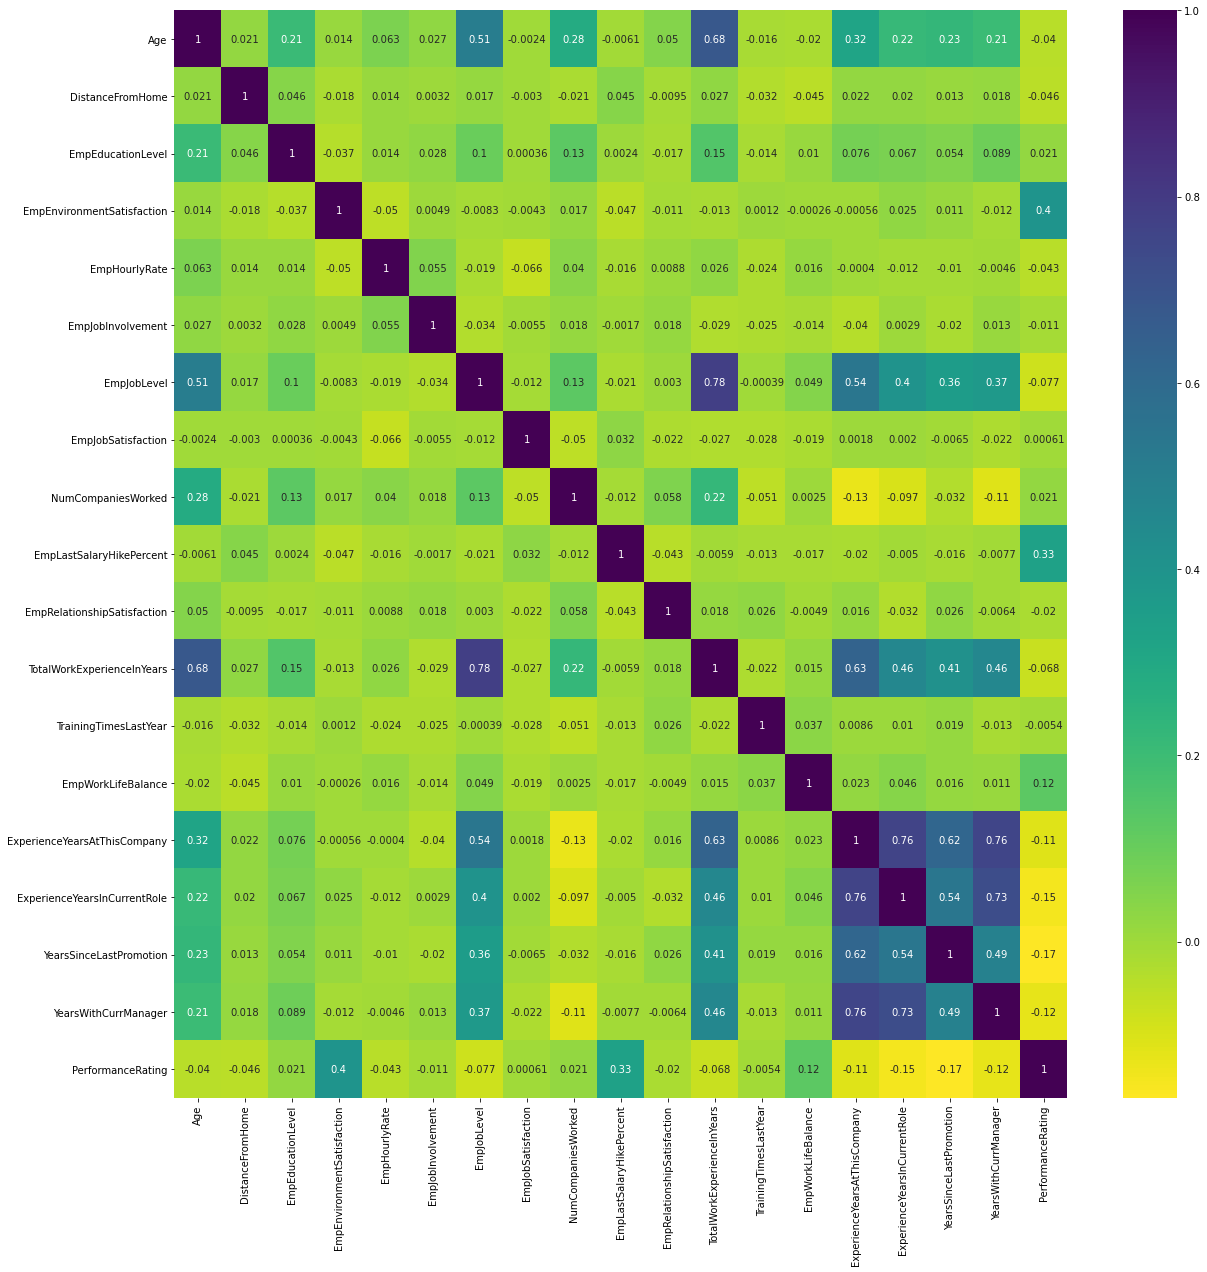

In [9]:
# Draft a heatmap to gather correlation of numerical features with each other
plt.figure(figsize=(20,20))

sns.heatmap(
    main_df.select_dtypes(['int64','float64']).corr(), 
    cmap='viridis_r', 
    annot=True
)
plt.show()

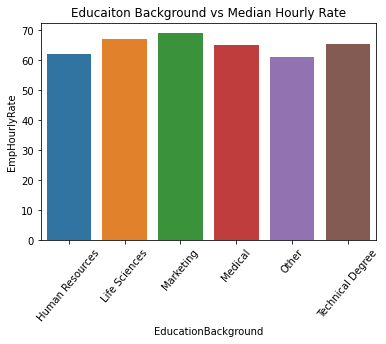

In [10]:
# Edcuation Background vs Median Hourly Rate

eb_hr_df = main_df.groupby('EducationBackground')['EmpHourlyRate'].median().reset_index()

sns.barplot(eb_hr_df['EducationBackground'], eb_hr_df['EmpHourlyRate']) 
plt.xticks(rotation=50)
plt.title("Educaiton Background vs Median Hourly Rate")
plt.show()

### Data distribution visualized for EDA

In [11]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.layouts import row, column
from bokeh.models import HoverTool
from bokeh.layouts import gridplot

#lets define a function that can futher be used to plot scatter plots for our bivariate combination of data
def plot_scatter(data, x, y, graph='circle'):
    source = ColumnDataSource(data)

    # Age vs EmpJobLevel
    h_age = [
        (x, "@"+x),
        (y, "@"+y)
    ]
    p1 = figure(
        plot_width=300, 
        plot_height=300, 
        title=f"{x} vs {y}", 
        tooltips=h_age, 
        tools='box_select,lasso_select,help,zoom_in,zoom_out'
    )
    p1.xaxis.axis_label = x
    p1.yaxis.axis_label = y
    getattr(p1, graph)(x, y, source=source)
    return p1

In [12]:
graph_combinations = [
    ("Age","EmpJobLevel"),
    ("Age","NumCompaniesWorked"),
    ("Age","TotalWorkExperienceInYears"),
    ("Age","ExperienceYearsAtThisCompany"),
    ("EmpEnvironmentSatisfaction","PerformanceRating"),
    ("EmpJobInvolvement","PerformanceRating"),
    ("EmpJobLevel","PerformanceRating"),
    ("EmpJobLevel","TotalWorkExperienceInYears"),
    ("EmpJobLevel","ExperienceYearsInCurrentRole"),
    ("EmpJobLevel","ExperienceYearsAtThisCompany"),
    ("EmpJobLevel","YearsSinceLastPromotion"),
    ("EmpJobLevel","YearsWithCurrManager"),
    ("EmpJobSatisfaction","PerformanceRating"),
    ("EmpLastSalaryHikePercent","PerformanceRating"),
    ("EmpRelationshipSatisfaction","PerformanceRating"),
    ("TotalWorkExperienceInYears","PerformanceRating"),
    ("TrainingTimesLastYear","PerformanceRating"),
    ("EmpWorkLifeBalance","PerformanceRating"),
    ("ExperienceYearsAtThisCompany","PerformanceRating"),
    ("YearsWithCurrManager","PerformanceRating"),
    ("YearsSinceLastPromotion","PerformanceRating"),
]

counter = 0
graphs = []
for i in graph_combinations:
    counter += 1
    globals()[f"var{counter}"] = plot_scatter(main_df, i[0], i[1], graph='circle')
    graphs.append(globals()[f"var{counter}"])
    

p = gridplot(
    [
        [var1, var2, var3],
        [var4, var5, var6],
        [var7, var8, var9],
        [var10, var11, var12],
        [var13, var14, var15],
        [var16, var17, var18],
        [var19, var20, var21],
    ])

output_file('INX_future_Bivariate_analysis.html')
save(p)

'C:\\Users\\sysadmin\\CDS-FINAL\\src\\Data Processing\\INX_future_Bivariate_analysis.html'

#### The graphs on the above generated file give out relatively less information on the density of distribution 
#### here we shall use the Kernal density estimate plots from seaborn

### Inference from visualization

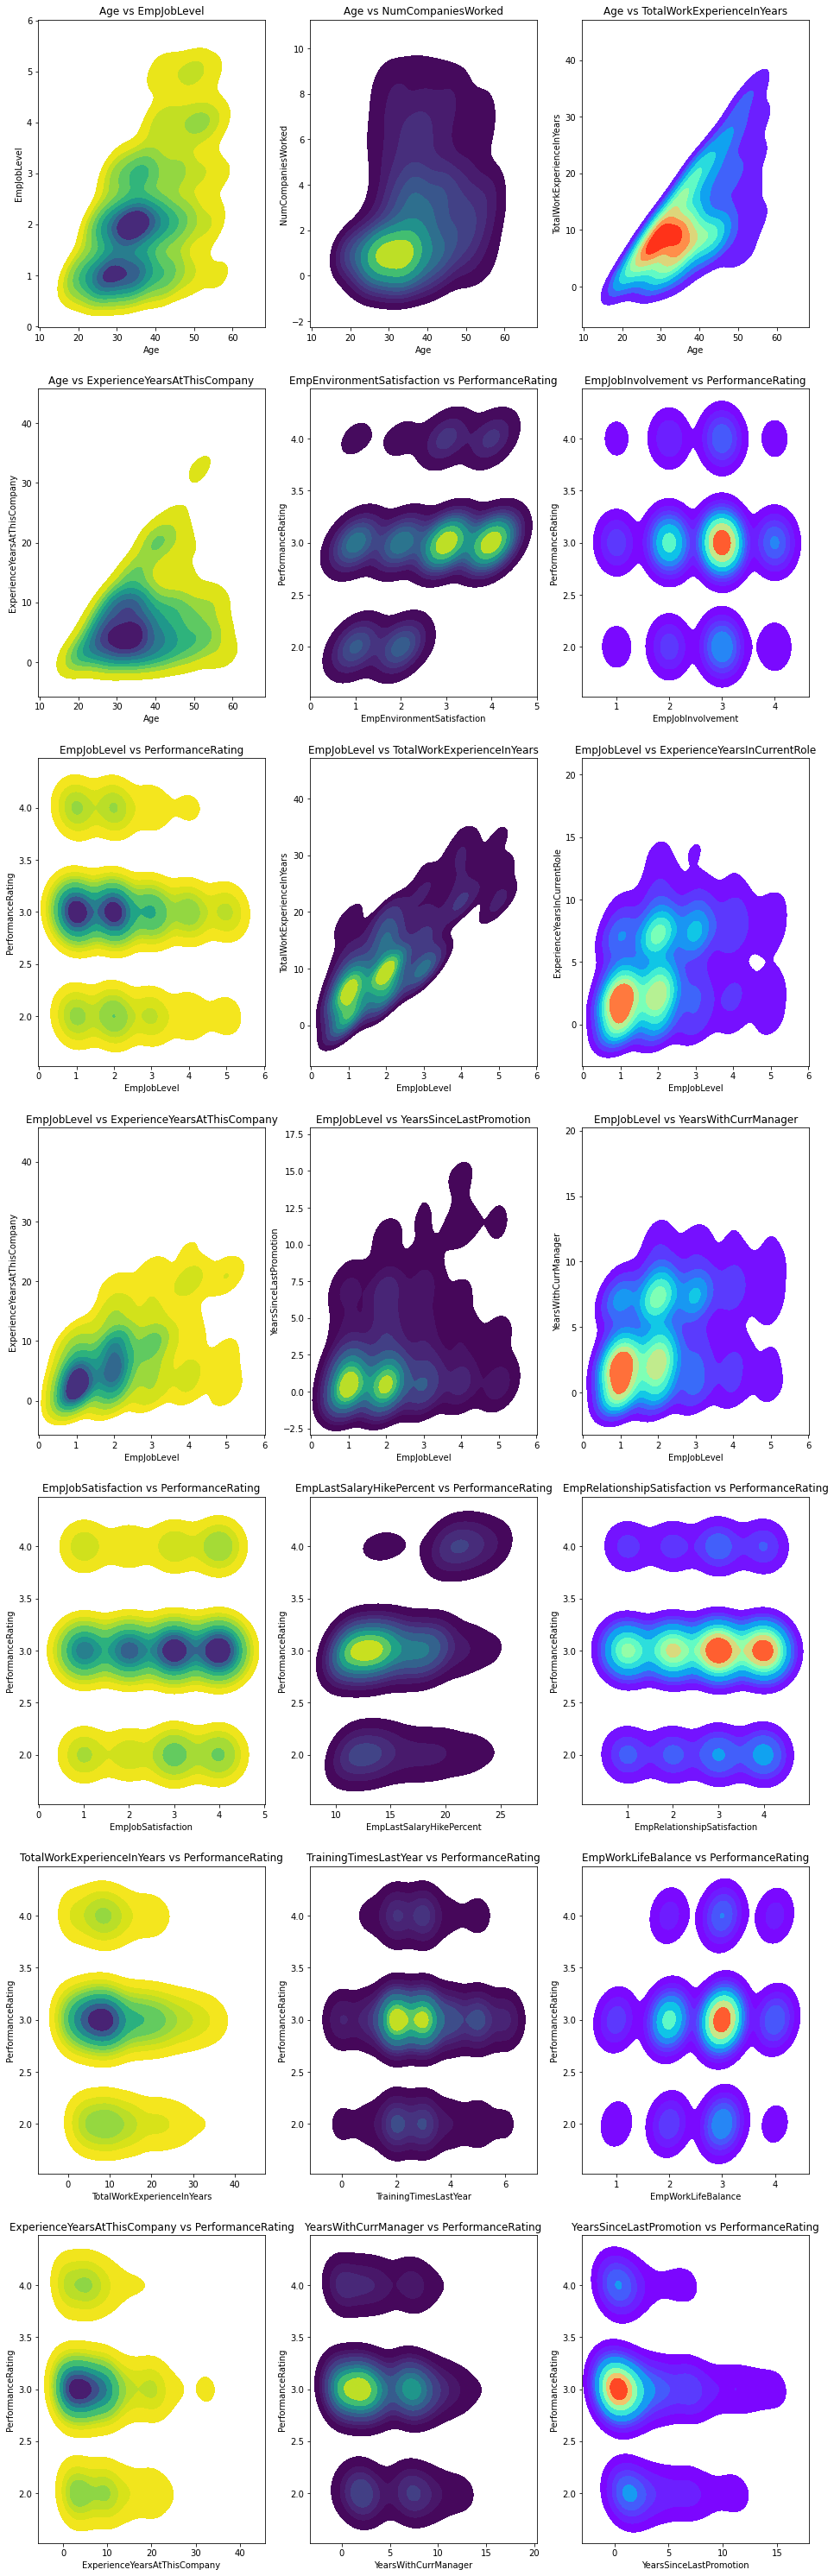

In [13]:
# lets generate some heatplots between two features and gather some inferences on the data using its distribution using kdeplots
fig, ax = plt.subplots(
    7,
    3,
    figsize=(16,14)
)

plt.subplots_adjust(
    bottom=0.1, 
    top=3
)

cmap = ['viridis_r', 'viridis', 'rainbow']

k = 0
for i in range(0,7):
    for j in range(0,3):
        sns.kdeplot(graph_combinations[k][0], graph_combinations[k][1], ax=ax[i,j], data=main_df, shade=True, cmap=cmap[j])
        ax[i,j].set(title=f"{graph_combinations[k][0]} vs {graph_combinations[k][1]}")
        k += 1

plt.show()

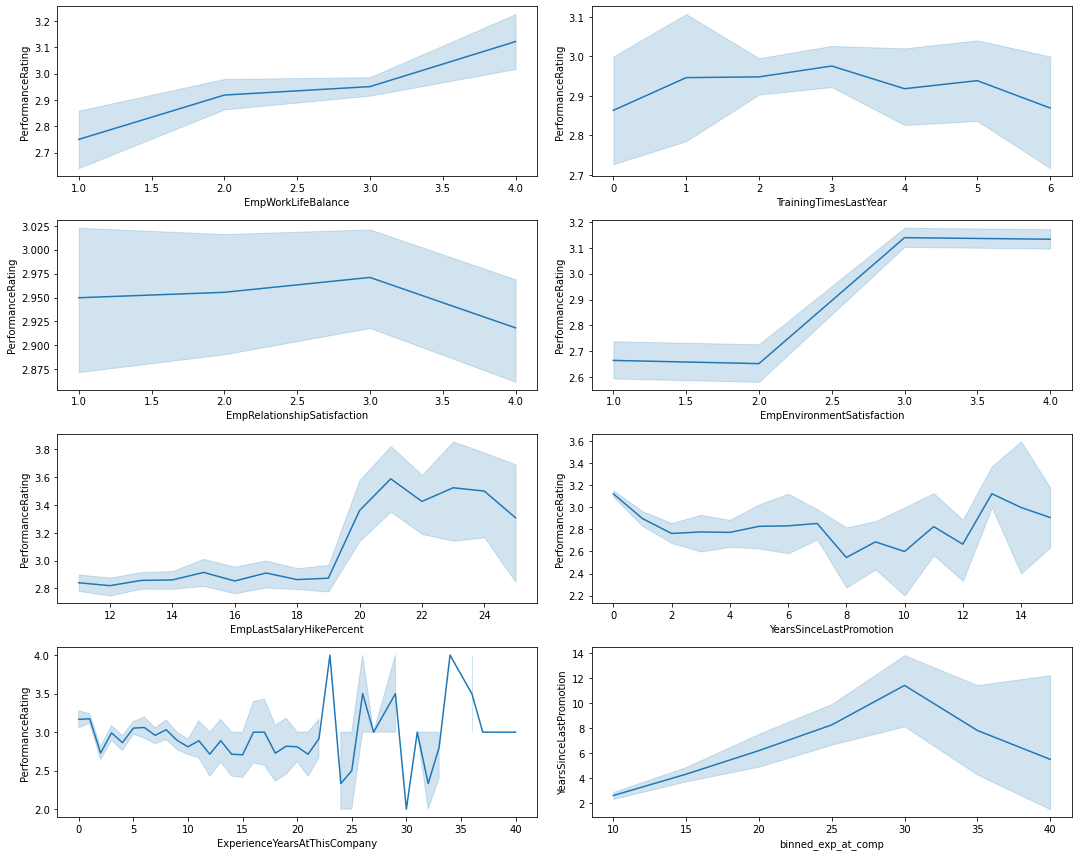

In [14]:
fig, ax = plt.subplots(4,2,figsize=(15, 12))
plt.subplots_adjust(
    top=1,
    bottom=0.2
)

x = main_df.sort_values('EmpWorkLifeBalance')
sns.lineplot(x="EmpWorkLifeBalance", y="PerformanceRating", ax=ax[0,0], data=x)

x = main_df.sort_values('TrainingTimesLastYear')
sns.lineplot(x="TrainingTimesLastYear", y="PerformanceRating", ax=ax[0,1], data=x)

x = main_df.sort_values('EmpRelationshipSatisfaction')
sns.lineplot(x="EmpRelationshipSatisfaction", y="PerformanceRating", ax=ax[1,0], data=x)

x = main_df.sort_values('EmpEnvironmentSatisfaction')
sns.lineplot(x="EmpEnvironmentSatisfaction", y="PerformanceRating", ax=ax[1,1], data=x)

x = main_df.sort_values('EmpLastSalaryHikePercent')
sns.lineplot(x="EmpLastSalaryHikePercent", y="PerformanceRating", ax=ax[2,0], data=x)

x = main_df.sort_values('YearsSinceLastPromotion')
sns.lineplot(x="YearsSinceLastPromotion", y="PerformanceRating", ax=ax[2,1], data=x)

x = main_df.sort_values('ExperienceYearsAtThisCompany')
sns.lineplot(x="ExperienceYearsAtThisCompany", y="PerformanceRating", ax=ax[3,0], data=x)

binned_exp = pd.cut(main_df.ExperienceYearsAtThisCompany, bins=[5, 10 ,15, 20, 25, 30, 35, 40]\
                   ,labels=[10, 15, 20, 25, 30 ,35, 40])
x = main_df
x['binned_exp_at_comp'] = binned_exp
sns.lineplot(x='binned_exp_at_comp',y="YearsSinceLastPromotion", ax=ax[3,1], data=x)

fig.tight_layout()

## Part 5: Inferences

## Inference from the heatmap that uses Pearson

- Here we have used __.corr()__ method to generation correlation among our numerical features and by default this method uses __Pearson's correlation__ although it does accept Spearman rank or Kendall Tau if required but we shall use here the standard correlation

1. The highly correlated features are TotalYearsOfExperience and EmpJobLevel
2. ExperienceYearsInCurrentRole, ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole, YearsWithCurrManager are also subsequently highly correlated
3. There is also a considerable correlation between ExperienceYearsAtThisCompany and YearsSinceLastPromotion although from the subsequent heatmaps and line charts it is clear that someone with experience higher than 35 years with this company or someone as new as having less than 15 years with this company is likely to get a promotion as compared to someone who has been associated with the company for more than 20 or less than 35 years

## Inference from the Kernal Density Estimate and LinePlots

1. The better the employee's worklife balance the better he/she performs
2. Trainings should be kept at a moderate amount as a very high amount of training is resulting in reducing employee performance
3. The Employee relationship should be kept in control and not very low or very high as that affects the performance rating of the employee
4. The higher the environment satisfaction the higher is the employee performance 
5. Employees with salary hike above 20 % tend to have a drastic increase in their performance

# EOD